1 ) Your Friend has developed the Product and he wants to establish the product startup
and he is searching for a perfect location where getting the investment has a high chance. 
But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. 
As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. 
Find the location where the most number of funding is done. That means, 
find the location where startups has received funding maximum number of times. 
Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". 
Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. 
Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. 
Consider the startup if any one of the city lies in given locations.


NCR 709
Bangalore 637
Mumbai 449


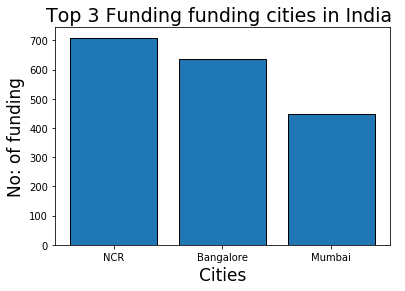

' I would suggest my friend to establish the product startup in NCR since it is the location where the most number of funding is done i,e 709 times'

In [26]:
# importing required libraries 
import pandas as pd
import matplotlib.pyplot as plt
#importing file from local 
data = pd.read_csv('startup_funding.csv')
df = data.copy() #copying it to another dataframe
#Replacing the citylocation with correct word
df['CityLocation'].replace('Delhi', 'New Delhi', inplace=True)
#converting all citylocation to lowercase and then to camelcase(case-sensitiveness issue is solved here)
df['CityLocation'] = df['CityLocation'].str.lower().str.title()
#Droping all NAn values from citylocation
df = df.dropna(subset=['CityLocation'])
#Creating a function to split elements in citylocation so that elements with ',' commas separated will form a single string
#and passing a for loop if any of the elements which we want matches is returned.
def con_city(city):
    cities = city.split('/')
    for i in cities:
        if (i.strip() == 'Bangalore'):
            return 'Bangalore'
        elif i.strip() == 'Mumbai' :
            return 'Mumbai'
        elif (i.strip() == 'Gurgaon') | (i.strip() == 'Noida') | (i.strip() == 'New Delhi'):
            return 'NCR'
#the fuction returns the value here and updates the citylocation column
df.CityLocation = df.CityLocation.apply(con_city)
#Here the bool value is compared with the dataFrame of citycolumn to get the required city dataframe only
df.CityLocation = df.CityLocation[(df.CityLocation == 'Bangalore') | (df.CityLocation == 'Mumbai') | (df.CityLocation == 'NCR')]
#value_counts gives the exact counts of the selected city
count_city = df.CityLocation.value_counts()
#index and values are stored here so we can use it to plot graph
city = count_city.index
count = count_city.values
#using for loop to get required values
for i in range(len(count_city)):
    print(count_city.index[i], count_city.values[i])
#Plot graph syntax are given below to plot the graph   
plt.bar(city, count, edgecolor='black')
# x axis label(name) is given as below
plt.xlabel('Cities',size = 17)
# y axis label(name) is given as below
plt.ylabel('No: of funding',size = 17)
#Title name is given by below command
plt.title('Top 3 Funding funding cities in India ', size = 19)
plt.show() 

''' I would suggest my friend to establish the product startup in NCR since it is the location where the most number of funding is done i,e 709 times'''

2) Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


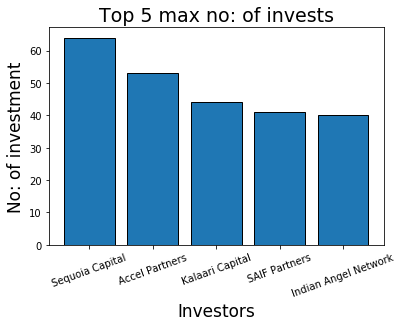

' I would suggest my friend to get some initial investment by contacting these investors who are the top 5 investors who have invested maximum number of times. 1.Sequoia Capital - 64, 2.Accel Partners - 53, 3.Kalaari Capital - 44, 4.SAIF Partners - 41, 5.Indian Angel Network - 40.'

In [27]:
# importing required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import operator
#importing file from local 
df = pd.read_csv('startup_funding.csv')
#Droping all NAn values from InvestorsName column
df.InvestorsName.dropna(inplace=True)
#Creating a dict
d = {}
#Creating a function to split every elements in InvestorsName so that elements with ',' commas separated will form a single string
#and passing a for loop and each Investors Name gets stored in d={} with thier respective values.
def indi(name):
    l = [i.strip() for i in str(name).split(',')]
    for j in l:
        d[j] = d.get(j,0) + 1

df.InvestorsName = df.InvestorsName.apply(indi)
# Now from dict d we consider every item and sorting them by value with reverse order and slicing to get only 5 elements
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True)[:5]
# Storing keys and values in seprately which can we used to plot bar graph
inves_name = []
inves_times = []
# Passing every element in sorted_d in a loop and appending it with printing the required output
for i in sorted_d:
    inves_name.append(i[0])
    inves_times.append(i[1])
    print(i[0], i[1])
#Plot graph syntax are given below to plot the graph
plt.bar(inves_name, inves_times, edgecolor='black')
# x axis label(name) is given as below
plt.xlabel('Investors',size = 17)
# y axis label(name) is given as below
plt.ylabel('No: of investment',size = 17)
#Title name is given by below command
plt.title('Top 5 max no: of invests', size = 19)
# To rotate the x-axis label below command is used.
plt.xticks(rotation= 20)
plt.show()

''' I would suggest my friend to get some initial investment by contacting these investors who are the top 5 investors who have invested maximum number of times. 1.Sequoia Capital - 64, 2.Accel Partners - 53, 3.Kalaari Capital - 44, 4.SAIF Partners - 41, 5.Indian Angel Network - 40.'''

3) After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


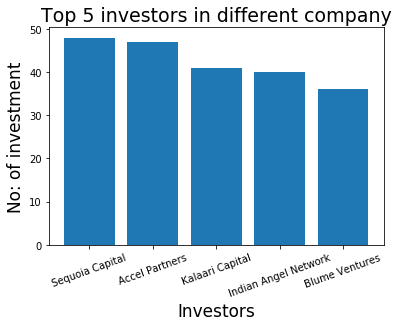

' I would suggest my friend to go to these top 5 investors who have invested maximum number of times in different companies. 1)Sequoia Capital - 48, 2)Accel Partners - 47, 3)Kalaari Capital - 41, 4)Indian Angel Network - 40, 5)Blume Ventures - 36.'

In [28]:
# importing required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import operator
#importing file from local 
df = pd.read_csv('startup_funding.csv')
#Droping all NAn values from InvestorsName and StartupName columns.
df.dropna(subset=['InvestorsName','StartupName'],inplace=True)
# by df.StartupName.unique() we get unique entries then Replacing the StartupName with correct words.
df['StartupName'].replace('Olacabs', 'Ola', inplace=True)
df['StartupName'].replace('Ola Cabs', 'Ola', inplace=True)
df['StartupName'].replace('Flipkart.com', 'Flipkart', inplace=True)
df['StartupName'].replace('Oyo Rooms', 'Oyo', inplace=True)
df['StartupName'].replace('Oyorooms', 'Oyo', inplace=True) 
df['StartupName'].replace('OyoRooms', 'Oyo', inplace=True)
df['StartupName'].replace('OYO Rooms', 'Oyo', inplace=True)
df['StartupName'].replace('Paytm Marketplace', 'Paytm', inplace=True)
#Creating a dict
d={}
# Looping through every element & creating a function to split every elements in InvestorsName so that elements with ',' commas separated will form a single string
# which is stored in 'inves' then inves is made strip and loop to fetch every values which is a string now. 
# Set is created so only unique entries are stored and for every element in 'inves'  StartupName are added and stored in d with respect to investor name.
for i in df.index:
    inves = df.InvestorsName[i].split(',')
    for j in inves:
        if j.strip() in d:
            d[j.strip()].add(df.StartupName[i])
        else:
            d[j.strip()] = set()
            d[j.strip()].add(df.StartupName[i])

d1 = {}
#Creating one more dict and looping to get the length of StartupName(values) in d and again store it in d1.
for i in d:
    d1[i] = len(d[i])
# Now from dict d1 we consider every item and sorting them by value with reverse order.
sorted_d = sorted(d1.items(), key=operator.itemgetter(1), reverse=True)
# Storing keys and values in seprately which can we used to plot bar graph
inves = []
num_in = []
# Passing every element in sorted_d in a loop and appending it with printing the required output
count = 0
for i in sorted_d:
    if i[0] != '':
        inves.append(i[0])
        num_in.append(i[1])
        print(i[0],i[1])
        count = count + 1
        if count == 5:
            break 
#Plot graph syntax are given below to plot the graph            
plt.bar(inves, num_in)
# To rotate the x-axis label below command is used.
plt.xticks(rotation=20)
# x axis label(name) is given as below
plt.xlabel('Investors',size = 17)
# y axis label(name) is given as below
plt.ylabel('No: of investment',size = 17)
#Title name is given by below command
plt.title('Top 5 investors in different company', size = 19)
plt.show()

''' I would suggest my friend to go to these top 5 investors who have invested maximum number of times in different companies. 1)Sequoia Capital - 48, 2)Accel Partners - 47, 3)Kalaari Capital - 41, 4)Indian Angel Network - 40, 5)Blume Ventures - 36.'''

4) Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


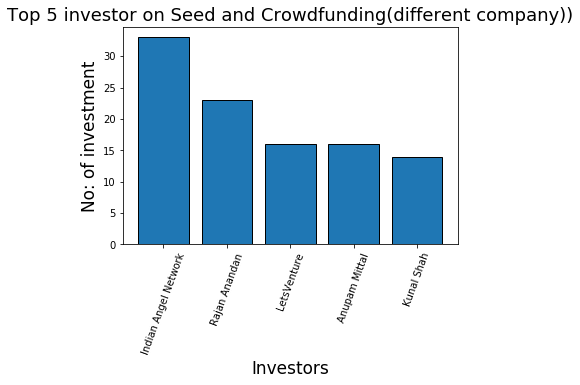

' To find the right investor i would suggest my friend look for Seed Funding and Crowdfunding which would be good for initial stage and give the following names of investors: 1.Indian Angel Network- 33, 2.Rajan Anandan- 23, 3.LetsVenture- 16, 4.Anupam Mittal- 16, 5.Kunal Shah- 14'

In [29]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import operator
#importing file from local 
df = pd.read_csv('startup_funding.csv')
#Droping all NAn values from InvestorsName and InvestmentType columns.
df.dropna(subset=['InvestorsName','InvestmentType'],inplace=True)
# by df.InvestorsName.unique() we get unique entries then 
# Unslecting & Relacing them with correct ones from dataFrame 
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df.InvestmentType.replace('Crowd funding', 'Crowd Funding', inplace=True)
df.InvestmentType.replace('SeedFunding', 'Seed Funding', inplace=True)
# by df.StartupName.unique() we get unique entries then 
# Relacing them with correct ones from dataFrame 
df['StartupName'].replace('Olacabs', 'Ola', inplace=True)
df['StartupName'].replace('Ola Cabs', 'Ola', inplace=True)
df['StartupName'].replace('Flipkart.com', 'Flipkart', inplace=True)
df['StartupName'].replace('Oyo Rooms', 'Oyo', inplace=True)
df['StartupName'].replace('Oyorooms', 'Oyo', inplace=True) 
df['StartupName'].replace('OyoRooms', 'Oyo', inplace=True)
df['StartupName'].replace('OYO Rooms', 'Oyo', inplace=True)
df['StartupName'].replace('Paytm Marketplace', 'Paytm', inplace=True)
#Creating a dict
d={} 
# Looping through every element & considering only Seed Funding and Crowd Funding.
#creating a function to split every elements in InvestorsName so that elements with ',' commas separated will form a single string
# which is stored in 'inves' then inves is made strip and loop. 
# Set is created so only unique entries are stored and for every element in 'inves' StartupName are added and stored in d with respect to investor name.
for i in df.index:
    if (df.InvestmentType[i] == 'Seed Funding') | (df.InvestmentType[i] == 'Crowd Funding'): 
        inves = df.InvestorsName[i].split(',')
        for j in inves:
            if j.strip() in d:
                d[j.strip()].add(df.StartupName[i])
            else:
                d[j.strip()] = set()
                d[j.strip()].add(df.StartupName[i])
#Creating one more dict.                
d1 = {}
#looping and ingnoring '' (whitespace) to get the length of StartupName(values) in d and again store it in d1.
for i in d:
    if i == '':
        continue
    d1[i] = len(d[i])
# Now from dict d1 we consider every item and sorting them by value with reverse order.
sorted_d1 = sorted(d1.items(), key=operator.itemgetter(1), reverse=True)  
# Storing keys and values in seprately which can we used to plot bar graph
inves = []
num_in = []
# Passing every element in sorted_d in a loop and appending it with printing the required output
count = 0
for i in sorted_d1:
    if i[0] !='Undisclosed Investors' or i[0] !='Undisclosed investors':
        inves.append(i[0])
        num_in.append(i[1])
        print(i[0],i[1])
        count = count + 1
        if count == 5:
            break
#Plot graph syntax are given below to plot the graph  
plt.bar(inves, num_in, edgecolor='black')
# To rotate the x-axis label below command is used.
plt.xticks(rotation=70)
# x axis label(name) is given as below
plt.xlabel('Investors',size = 17)
# y axis label(name) is given as below
plt.ylabel('No: of investment',size = 17)
#Title name is given by below command
plt.title('Top 5 investor on Seed and Crowdfunding(different company))', size = 18)
plt.show()

''' To find the right investor i would suggest my friend look for Seed Funding and Crowdfunding which would be good for initial stage and give the following names of investors: 1.Indian Angel Network- 33, 2.Rajan Anandan- 23, 3.LetsVenture- 16, 4.Anupam Mittal- 16, 5.Kunal Shah- 14''' 

5) Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


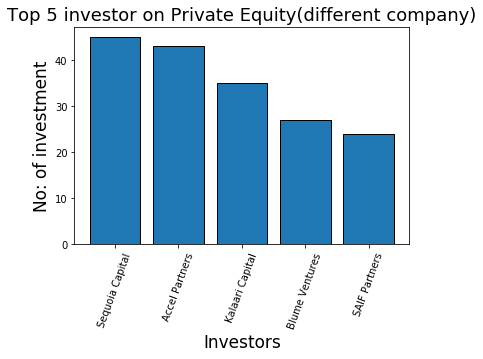

'To find the right investor to expand his startup, i would suggest my friend look for Private Equity type investment investors, give the following names of investors: 1.Sequoia Capital- 45, 2.Accel Partners- 43, 3.Kalaari Capital- 35, 4.Blume Ventures- 27, 5.SAIF Partners- 24'

In [2]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import operator
#importing file from local 
df = pd.read_csv('startup_funding.csv')
#Droping all NAn values from InvestorsName and InvestmentType columns.
df.dropna(subset=['InvestorsName','InvestmentType'],inplace=True)
# by df.InvestorsName.unique() we get unique entries then 
# Unslecting & Relacing them with correct ones from dataFrame 
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df.InvestmentType.replace('PrivateEquity', 'Private Equity', inplace=True)
# by df.StartupName.unique() we get unique entries then 
# Relacing them with correct ones from dataFrame 
df['StartupName'].replace('Olacabs', 'Ola', inplace=True)
df['StartupName'].replace('Ola Cabs', 'Ola', inplace=True)
df['StartupName'].replace('Flipkart.com', 'Flipkart', inplace=True)
df['StartupName'].replace('Oyo Rooms', 'Oyo', inplace=True)
df['StartupName'].replace('Oyorooms', 'Oyo', inplace=True) 
df['StartupName'].replace('OyoRooms', 'Oyo', inplace=True)
df['StartupName'].replace('OYO Rooms', 'Oyo', inplace=True)
df['StartupName'].replace('Paytm Marketplace', 'Paytm', inplace=True)
#Creating a dict
d={} 
# Looping through every element & considering only Private Equity.
#creating a function to split every elements in InvestorsName so that elements with ',' commas separated will form a single string
# which is stored in 'inves' then inves is made strip and loop. 
# Set is created so only unique entries are stored and for every element in 'inves' StartupName are added and stored in d with respect to investor name.
for i in df.index:
    if (df.InvestmentType[i] == 'Private Equity'):
        inves = df.InvestorsName[i].split(',')
        for j in inves:
            if j.strip() in d:
                d[j.strip()].add(df.StartupName[i])
            else:
                d[j.strip()] = set()
                d[j.strip()].add(df.StartupName[i])
#Creating one more dict.
d1 = {}
#looping and ingnoring '' (whitespace) to get the length of StartupName(values) in d and again store it in d1.
for i in d:
    if i == '':
        continue
    d1[i] = len(d[i])
# Now from dict d1 we consider every item and sorting them by value with reverse order.
sorted_d1 = sorted(d1.items(), key=operator.itemgetter(1), reverse=True)  
# Storing keys and values in seprately which can we used to plot bar graph
inves = []
num_in = []
# Passing every element in sorted_d in a loop and appending it with printing the required output
count = 0
for i in sorted_d1:
    if i[0] !='Undisclosed Investors' or i[0] !='Undisclosed investors':
        inves.append(i[0])
        num_in.append(i[1])
        print(i[0],i[1])
        count = count + 1
        if count == 5:
            break
#Plot graph syntax are given below to plot the graph  
plt.bar(inves, num_in, edgecolor='black')
# To rotate the x-axis label below command is used.
plt.xticks(rotation=70)
# x axis label(name) is given as below
plt.xlabel('Investors',size = 17)
# y axis label(name) is given as below
plt.ylabel('No: of investment',size = 17)
#Title name is given by below command
plt.title('Top 5 investor on Private Equity(different company)', size = 18)
plt.show()

'''To find the right investor to expand his startup, i would suggest my friend look for Private Equity type investment investors, give the following names of investors: 1.Sequoia Capital- 45, 2.Accel Partners- 43, 3.Kalaari Capital- 35, 4.Blume Ventures- 27, 5.SAIF Partners- 24'''

In [3]:
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
